In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPRegressor

In [2]:
data = pd.read_csv("xu3_dataset.csv")
test_data_black = pd.read_csv("xu3_blackscholes.csv")
test_data_body = pd.read_csv("xu3_bodytrack.csv")

In [3]:
test_data_body

,total_watts,w_big,w_little,w_gpu,w_mem,usage_c4,usage_c5,usage_c6,usage_c7,temp4,temp5,temp6,temp7,temp_gpu,freq_big_cluster
0,2.981,0.465327,0.034884,0.119160,0.03050,0.000000,0.0000,0.0,0.0,59,63,63,59,58,1500000000
1,2.973,0.525705,0.036720,0.119160,0.04026,0.000000,0.1875,0.0,0.0,59,63,63,59,58,1500000000
2,2.973,0.525705,0.039474,0.119160,0.04026,0.000000,0.0000,0.0,0.0,59,63,63,59,58,1500000000
3,2.973,0.465920,0.036720,0.119160,0.03660,0.000000,0.0000,0.0,0.0,59,63,63,59,58,1500000000
4,2.973,0.464286,0.036720,0.119160,0.03050,0.000000,0.0000,0.0,0.0,59,63,62,59,58,1500000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,3.084,0.484065,0.037597,0.130083,0.03538,0.142857,0.0000,0.0,0.0,63,67,67,63,61,1500000000
1450,3.084,0.545484,0.039431,0.130083,0.03538,0.000000,0.0000,0.0,0.0,63,67,67,63,62,1500000000
1451,3.168,0.484640,0.039431,0.130083,0.03660,0.000000,0.0000,0.0,0.0,63,67,66,63,62,1500000000
1452,3.084,0.485106,0.042182,0.130083,0.03660,0.000000,0.0000,0.0,0.0,63,67,66,63,61,1500000000


In [4]:
data['total_watts'].min()

2.6180000000000003

In [5]:
data['cluster_state'] = np.where(data['w_big'] >= 1, 1, 0)
test_data_black['cluster_state'] = np.where(test_data_black['w_big'] >= 1, 1, 0)
test_data_body['cluster_state'] = np.where(test_data_body['w_big'] >= 1, 1, 0)

In [6]:
data

,total_watts,w_big,w_little,w_gpu,w_mem,usage_c4,usage_c5,usage_c6,usage_c7,temp4,temp5,temp6,temp7,temp_gpu,freq_big_cluster,cluster_state
0,3.065,0.474810,0.033012,0.096321,0.048800,0.0,0.0,0.0,0.0,49,53,52,48,47,1000000000,0
1,2.706,0.235620,0.032095,0.096515,0.032940,0.0,0.0,0.0,0.0,48,52,52,48,47,1000000000,0
2,2.706,0.235620,0.034846,0.096515,0.032940,0.0,0.0,0.0,0.0,48,52,52,48,47,1000000000,0
3,2.637,0.234685,0.034846,0.096321,0.037758,0.0,0.0,0.0,0.0,48,51,51,48,47,1000000000,0
4,2.637,0.233750,0.033929,0.096321,0.032886,0.0,0.0,0.0,0.0,48,51,51,48,47,1000000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410,3.844,1.157646,0.039474,0.123132,0.035380,0.0,0.0,0.0,0.0,63,67,67,62,60,2000000000,1
5411,3.851,1.157646,0.038514,0.123132,0.036600,0.0,0.0,0.0,0.0,63,67,67,62,60,2000000000,1
5412,3.851,1.156364,0.041310,0.124125,0.036600,0.0,0.0,0.0,0.0,63,67,67,62,60,2000000000,1
5413,3.851,1.158024,0.037638,0.124125,0.036600,0.0,0.0,0.0,0.0,63,67,67,62,60,2000000000,1


In [7]:
Y = data['cluster_state']
y_test_black = test_data_black['cluster_state']
y_test_body = test_data_body['cluster_state']
X = data.drop(['w_big', 'cluster_state', 'usage_c4', 'usage_c5', 'usage_c6', 'usage_c7'], axis=1)
x_test_black = test_data_black.drop(['w_big', 'cluster_state', 'usage_c4', 'usage_c5', 'usage_c6', 'usage_c7'], axis=1)
x_test_body = test_data_body.drop(['w_big', 'cluster_state', 'usage_c4', 'usage_c5', 'usage_c6', 'usage_c7'], axis=1)

In [8]:
X

,total_watts,w_little,w_gpu,w_mem,temp4,temp5,temp6,temp7,temp_gpu,freq_big_cluster
0,3.065,0.033012,0.096321,0.048800,49,53,52,48,47,1000000000
1,2.706,0.032095,0.096515,0.032940,48,52,52,48,47,1000000000
2,2.706,0.034846,0.096515,0.032940,48,52,52,48,47,1000000000
3,2.637,0.034846,0.096321,0.037758,48,51,51,48,47,1000000000
4,2.637,0.033929,0.096321,0.032886,48,51,51,48,47,1000000000
...,...,...,...,...,...,...,...,...,...,...
5410,3.844,0.039474,0.123132,0.035380,63,67,67,62,60,2000000000
5411,3.851,0.038514,0.123132,0.036600,63,67,67,62,60,2000000000
5412,3.851,0.041310,0.124125,0.036600,63,67,67,62,60,2000000000
5413,3.851,0.037638,0.124125,0.036600,63,67,67,62,60,2000000000


As you can see above, we used the above features in our feature matrix before training both the decision tree classifier and our linear regression models.

Here are the shapes of each of the training/testing data sets..

In [9]:
X.shape

(5415, 10)

In [10]:
Y.shape

(5415,)

In [11]:
y_test_black.shape

(1653,)

In [12]:
y_test_body.shape

(1454,)

### Logistic Regression

Blackscholes data set

In [13]:
model = linear_model.LogisticRegression(penalty = 'none')
model.fit(X, Y)

predictions = model.predict(x_test_black)

In [14]:
model.score(X, Y)

0.6672206832871653

In [15]:
cm = metrics.confusion_matrix(y_test_black, predictions)
score = model.score(x_test_black, y_test_black)

In [16]:
def con_mat(cm, score):    
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15)

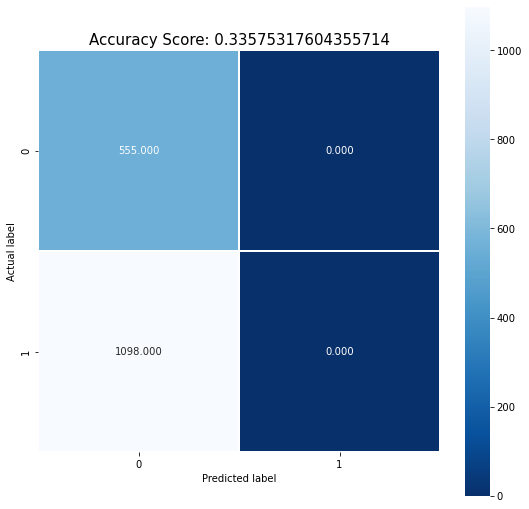

In [17]:
con_mat(cm, score)

bodytrack data set

0.6672206832871653


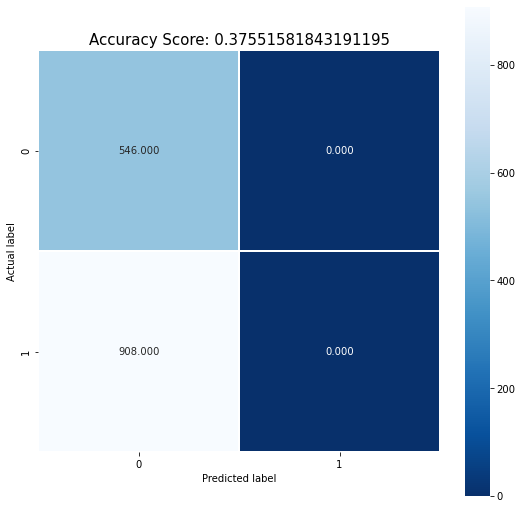

In [18]:
model = linear_model.LogisticRegression(penalty = 'none')
model.fit(X, Y)

predictions = model.predict(x_test_body)

print(model.score(X, Y))

cm = metrics.confusion_matrix(y_test_body, predictions)
score = model.score(x_test_body, y_test_body)

con_mat(cm, score)

### Decision Tree

blackscholes data set

Training Accuracy: 1.0


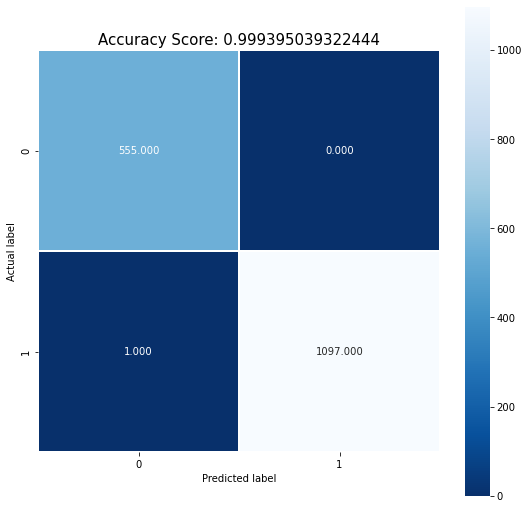

In [19]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X, Y)

train_pred = model_tree.predict(X)
predictions_tree = model_tree.predict(x_test_black)


cm_tree = metrics.confusion_matrix(y_test_black, predictions_tree)
score_tree = model_tree.score(x_test_black, y_test_black)

con_mat(cm_tree, score_tree)

print("Training Accuracy: " + str(model_tree.score(X, Y)))


bodytrack data set

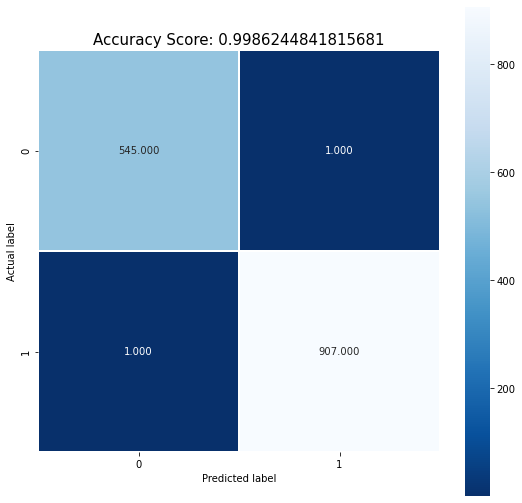

In [20]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X, Y)

train_pred = model_tree.predict(X)
predictions_tree = model_tree.predict(x_test_body)


cm_tree = metrics.confusion_matrix(y_test_body, predictions_tree)
score_tree = model_tree.score(x_test_body, y_test_body)

con_mat(cm_tree, score_tree)

#print("Training Accuracy: " + str(model_tree.score(X, Y)))


### Linear Regression

In [21]:
data = pd.read_csv("xu3_dataset.csv")
test_data_black = pd.read_csv("xu3_blackscholes.csv")
test_data_body = pd.read_csv("xu3_bodytrack.csv")

In [22]:
Y = data['w_big']
y_test_black = test_data_black['w_big']
y_test_body = test_data_body['w_big']
X = data.drop(['w_big', 'usage_c4', 'usage_c5', 'usage_c6', 'usage_c7'], axis=1)
x_test_black = test_data_black.drop(['w_big','usage_c4', 'usage_c5', 'usage_c6', 'usage_c7'], axis=1)
x_test_body = test_data_body.drop(['w_big','usage_c4', 'usage_c5', 'usage_c6', 'usage_c7'], axis=1)

In [23]:
X

,total_watts,w_little,w_gpu,w_mem,temp4,temp5,temp6,temp7,temp_gpu,freq_big_cluster
0,3.065,0.033012,0.096321,0.048800,49,53,52,48,47,1000000000
1,2.706,0.032095,0.096515,0.032940,48,52,52,48,47,1000000000
2,2.706,0.034846,0.096515,0.032940,48,52,52,48,47,1000000000
3,2.637,0.034846,0.096321,0.037758,48,51,51,48,47,1000000000
4,2.637,0.033929,0.096321,0.032886,48,51,51,48,47,1000000000
...,...,...,...,...,...,...,...,...,...,...
5410,3.844,0.039474,0.123132,0.035380,63,67,67,62,60,2000000000
5411,3.851,0.038514,0.123132,0.036600,63,67,67,62,60,2000000000
5412,3.851,0.041310,0.124125,0.036600,63,67,67,62,60,2000000000
5413,3.851,0.037638,0.124125,0.036600,63,67,67,62,60,2000000000


blacksholes

In [24]:
model = linear_model.LinearRegression()
model.fit(X, Y)

train_pred = model.predict(X)
predictions = model.predict(x_test_black)

mse_train = metrics.mean_squared_error(Y, train_pred)
mse = metrics.mean_squared_error(y_test_black, predictions)

print("Train MSE: " + str(mse_train))
print("Test MSE: " + str(mse))
print(model.score(x_test_black, y_test_black))


Train MSE: 0.0018128606164643324
Test MSE: 0.0031462623403009163
0.9977033464816562


bodytrack

In [25]:
model = linear_model.LinearRegression()
model.fit(X, Y)

train_pred = model.predict(X)
predictions = model.predict(x_test_body)

mse_train = metrics.mean_squared_error(Y, train_pred)
mse = metrics.mean_squared_error(y_test_body, predictions)

print("Train MSE: " + str(mse_train))
print("Test MSE: " + str(mse))
print(model.score(x_test_body, y_test_body))


Train MSE: 0.0018128606164643324
Test MSE: 0.09625905716512437
0.9385784987293606


In [26]:
print("done")

done


## Problem 3

In [65]:
data = pd.read_csv("xu3_dataset.csv")
test_data_black = pd.read_csv("xu3_blackscholes.csv")
test_data_body = pd.read_csv("xu3_bodytrack.csv")

In [66]:
temp_data_black = test_data_black[['temp4', 'temp5', 'temp6', 'temp7']]
test_black_4 = test_data_black['temp4']
test_black_5 = test_data_black['temp5']
test_black_6 = test_data_black['temp6']
test_black_7 = test_data_black['temp7']

In [67]:
temp_data_body = test_data_body[['temp4', 'temp5', 'temp6', 'temp7']]
test_body_4 = test_data_body['temp4']
test_body_5 = test_data_body['temp5']
test_body_6 = test_data_body['temp6']
test_body_7 = test_data_body['temp7']

In [68]:
temp_data = data[['temp4', 'temp5', 'temp6', 'temp7']]
test_4 = data['temp4']
test_5 = data['temp5']
test_6 = data['temp6']
test_7 = data['temp7']

In [69]:
test_4

0       49
1       48
2       48
3       48
4       48
        ..
5410    63
5411    63
5412    63
5413    63
5414    63
Name: temp4, Length: 5415, dtype: int64

In [70]:
test_4 = test_4.shift(-1)
test_4 = test_4.drop(len(test_4)-1)
test_5 = test_5.shift(-1)
test_5 = test_5.drop(len(test_5)-1)
test_6 = test_6.shift(-1)
test_6 = test_6.drop(len(test_6)-1)
test_7 = test_7.shift(-1)
test_7 = test_7.drop(len(test_7)-1)

In [71]:
test_black_4 = test_black_4.shift(-1)
test_black_4 = test_black_4.drop(len(test_black_4)-1)
test_black_5 = test_black_5.shift(-1)
test_black_5 = test_black_5.drop(len(test_black_5)-1)
test_black_6 = test_black_6.shift(-1)
test_black_6 = test_black_6.drop(len(test_black_6)-1)
test_black_7 = test_black_7.shift(-1)
test_black_7 = test_black_7.drop(len(test_black_7)-1)

In [72]:
test_body_4 = test_body_4.shift(-1)
test_body_4 = test_body_4.drop(len(test_body_4)-1)
test_body_5 = test_body_5.shift(-1)
test_body_5 = test_body_5.drop(len(test_body_5)-1)
test_body_6 = test_body_6.shift(-1)
test_body_6 = test_body_6.drop(len(test_body_6)-1)
test_body_7 = test_body_7.shift(-1)
test_body_7 = test_body_7.drop(len(test_body_7)-1)

In [73]:
temp_data

,temp4,temp5,temp6,temp7
0,49,53,52,48
1,48,52,52,48
2,48,52,52,48
3,48,51,51,48
4,48,51,51,48
...,...,...,...,...
5410,63,67,67,62
5411,63,67,67,62
5412,63,67,67,62
5413,63,67,67,62


In [74]:
temp_data = temp_data.drop(len(temp_data) - 1)
temp_data_black = temp_data_black.drop(len(temp_data_black) - 1)
temp_data_body = temp_data_body.drop(len(temp_data_body) - 1)
temp_data

,temp4,temp5,temp6,temp7
0,49,53,52,48
1,48,52,52,48
2,48,52,52,48
3,48,51,51,48
4,48,51,51,48
...,...,...,...,...
5409,63,67,67,62
5410,63,67,67,62
5411,63,67,67,62
5412,63,67,67,62


### Temp 4 Model

MSE Core 4 (Blackscholes):  0.15376662457196358
MSE Core 4: (Bodytrack) 1.4208547649285843
Score Core 4 (Blackscholes): 0.9982504259524051
Score Core 4 (Bodytrack): 0.9806982520076866


Text(0.5, 1.0, 'Predicted Temp For Core 4 vs Acual Temp (Blackschole)')

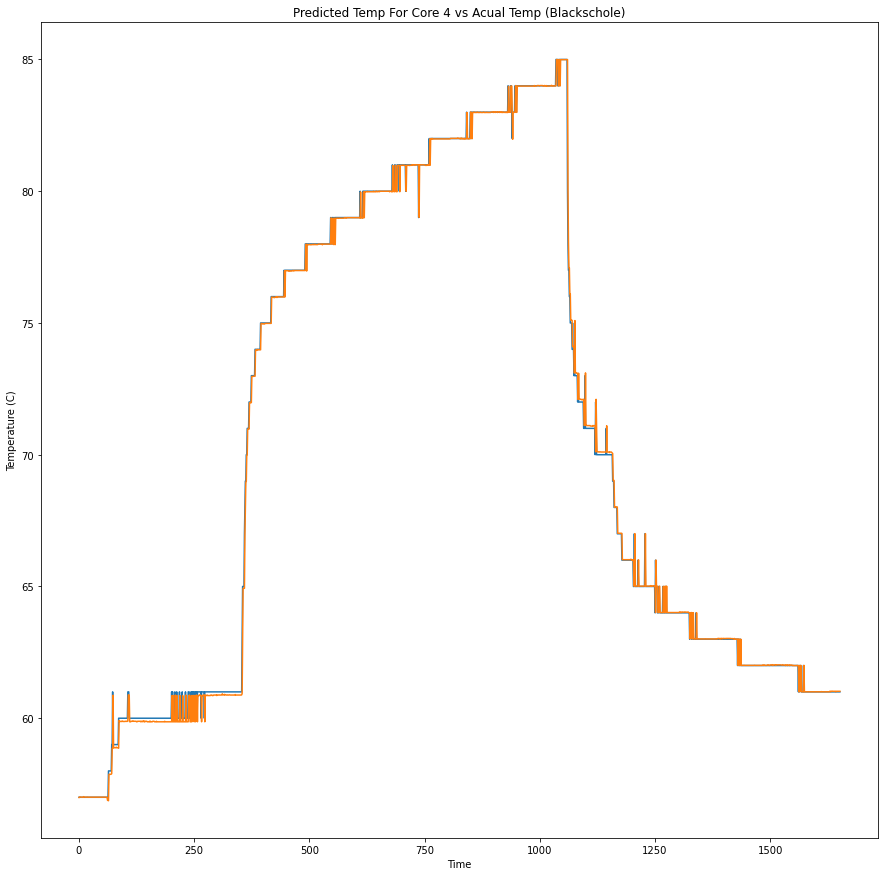

In [101]:
model_4 = MLPRegressor(hidden_layer_sizes=(100,60,30), activation='relu', random_state=0)

model_4.fit(temp_data, test_4)
prediction_black_4 = model_4.predict(temp_data_black)
mse_black_4 = metrics.mean_squared_error(test_black_4, prediction_black_4)
print("MSE Core 4 (Blackscholes): ", mse_black_4)
prediction_body_4 = model_4.predict(temp_data_body)
mse_body_4 = metrics.mean_squared_error(test_body_4, prediction_body_4)
print("MSE Core 4: (Bodytrack)", mse_body_4)
print("Score Core 4 (Blackscholes):", model_4.score(temp_data_black, test_black_4))
print("Score Core 4 (Bodytrack):", model_4.score(temp_data_body, test_body_4))

fig = plt.figure(figsize=(15,15))
plt.plot(test_black_4)
plt.plot(prediction_black_4)
plt.xlabel("Time")
plt.ylabel("Temperature (C)")
plt.title("Predicted Temp For Core 4 vs Acual Temp (Blackschole)")

Text(0.5, 1.0, 'Predicted Temp For Core 4 vs Acual Temp (Bodytrack)')

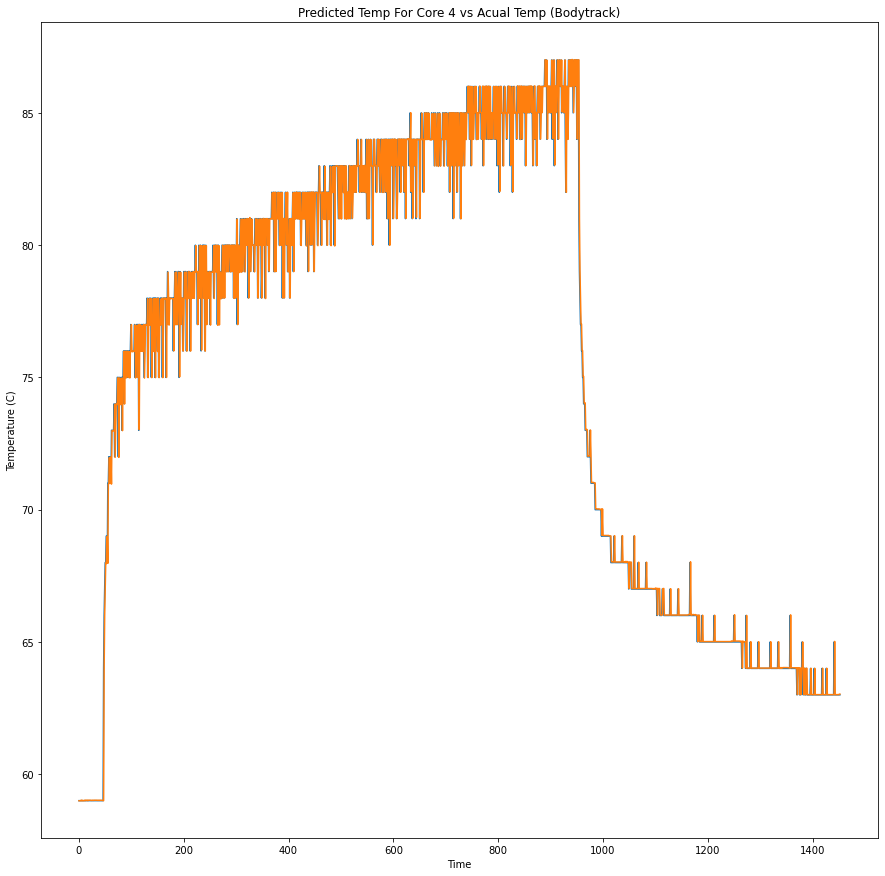

In [100]:
fig2 = plt.figure(figsize=(15,15))
plt.plot(test_body_4)
plt.plot(prediction_body_4)
plt.xlabel("Time")
plt.ylabel("Temperature (C)")
plt.title("Predicted Temp For Core 4 vs Acual Temp (Bodytrack)")

### Temp 5 Model

In [102]:
model_5 = MLPRegressor(hidden_layer_sizes=(100,60,30), activation='relu', random_state=0)

model_5.fit(temp_data, test_5)
prediction_black_5 = model_5.predict(temp_data_black)
mse_black_5 = metrics.mean_squared_error(test_black_5, prediction_black_5)
print("MSE Core 5 (Blackscholes): ", mse_black_5)
prediction_body_5 = model_5.predict(temp_data_body)
mse_body_5 = metrics.mean_squared_error(test_body_5, prediction_body_5)
print("MSE Core 5: (Bodytrack)", mse_body_5)
print("Score Core 5 (Blackscholes):", model_5.score(temp_data_black, test_black_5))
print("Score Core 5 (Bodytrack):", model_5.score(temp_data_body, test_body_5))

MSE Core 5 (Blackscholes):  0.3220482476119708
MSE Core 5: (Bodytrack) 1.4014931166414206
Score Core 5 (Blackscholes): 0.9970411277629407
Score Core 5 (Bodytrack): 0.9864775387350785


### Temp 6 Model

In [103]:
model_6 = MLPRegressor(hidden_layer_sizes=(100,60,30), activation='relu', random_state=0)

model_6.fit(temp_data, test_6)
prediction_black_6 = model_6.predict(temp_data_black)
mse_black_6 = metrics.mean_squared_error(test_black_6, prediction_black_6)
print("MSE Core 6 (Blackscholes): ", mse_black_6)
prediction_body_6 = model_6.predict(temp_data_body)
mse_body_6 = metrics.mean_squared_error(test_body_6, prediction_body_6)
print("MSE Core 6: (Bodytrack)", mse_body_6)
print("Score Core 6 (Blackscholes):", model_6.score(temp_data_black, test_black_6))
print("Score Core 6 (Bodytrack):", model_6.score(temp_data_body, test_body_6))

MSE Core 6 (Blackscholes):  0.18962233037564905
MSE Core 6: (Bodytrack) 1.408207076135012
Score Core 6 (Blackscholes): 0.9980584549211076
Score Core 6 (Bodytrack): 0.9865044458730869


### Temp 7 Model

In [104]:
model_7 = MLPRegressor(hidden_layer_sizes=(100,60,30), activation='relu', random_state=0)

model_7.fit(temp_data, test_7)
prediction_black_7 = model_7.predict(temp_data_black)
mse_black_7 = metrics.mean_squared_error(test_black_7, prediction_black_7)
print("MSE Core 7 (Blackscholes): ", mse_black_7)
prediction_body_7 = model_7.predict(temp_data_body)
mse_body_7 = metrics.mean_squared_error(test_body_7, prediction_body_7)
print("MSE Core 7: (Bodytrack)", mse_body_7)
print("Score Core 7 (Blackscholes):", model_7.score(temp_data_black, test_black_7))
print("Score Core 7 (Bodytrack):", model_7.score(temp_data_body, test_body_7))

MSE Core 7 (Blackscholes):  0.11576752903213744
MSE Core 7: (Bodytrack) 0.735954478734501
Score Core 7 (Blackscholes): 0.9984722667872097
Score Core 7 (Bodytrack): 0.988538328540986
